In [ ]:
!pip install --upgrade ipywidgets albumentations


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 13.9 MB/s eta 0:00:00a 0:00:01


In [ ]:
from ultralytics import YOLO

In [ ]:
import yaml


# Define the class names
class_names = [
    'bottle-blue',
    'bottle-green',
    'bottle-dark',
    'bottle-milk',
    'bottle-transp',
    'bottle-multicolor',
    'bottle-yogurt',
    'bottle-oil',
    'cans',
    'juice-cardboard',
    'milk-cardboard',
    'detergent-color',
    'detergent-transparent',
    'detergent-box',
    'canister',
    'bottle-blue-full',
    'bottle-transp-full',
    'bottle-dark-full',
    'bottle-green-full',
    'bottle-multicolorv-full',
    'bottle-milk-full',
    'bottle-oil-full',
    'detergent-white',
    'bottle-blue5l',
    'bottle-blue5l-full',
    'glass-transp',
    'glass-dark',
    'glass-green'
]
nc = len(class_names)


# Define the configuration as a dictionary
data_config = {
    'train': '/kaggle/input/warp-waste-recycling-plant-dataset/Warp-D/train',
    'val': '/kaggle/input/warp-waste-recycling-plant-dataset/Warp-D/test',
    'nc': nc,  # total number of classes
    'names': class_names,
    }

# Save the configuration to a data.yaml file in the current Kaggle working directory
with open('/kaggle/working/data.yaml', 'w') as file:
    yaml.dump(data_config, file, default_flow_style=False)

print("data.yaml file created successfully in /kaggle/working/")


In [ ]:
import yaml

# Define the augmentation and hyperparameter settings
hyp_config = {
    'flipud': 0.0,         # Vertical flip probability (0 means disabled)
    'fliplr': 0.5,         # Horizontal flip probability
    'mosaic': 1.0,         # Mosaic augmentation probability
    'mixup': 0.2,          # MixUp augmentation probability
    'degrees': 10.0,       # Rotation angle (+/- degrees)
    'translate': 0.1,      # Translation (+/- fraction)
    'scale': 0.5,          # Scaling factor
    'shear': 2.0,          # Shear angle (+/- degrees)
    'perspective': 0.0,    # Perspective distortion
    'hsv_h': 0.015,        # HSV hue augmentation
    'hsv_s': 0.7,          # HSV saturation augmentation
    'hsv_v': 0.4,          # HSV value augmentation
    
    # Additional hyperparameters for training
    'lr0': 0.01,           # Initial learning rate
    'momentum': 0.937,     # Momentum
    'weight_decay': 0.0005 # Weight decay
}

# Save the configuration to hyp.yaml file
with open('/kaggle/working/hyp.yaml', 'w') as file:
    yaml.dump(hyp_config, file, default_flow_style=False)

print("hyp.yaml file created successfully in /kaggle/working/")


In [ ]:
from ultralytics import YOLO
import albumentations as A
import cv2
import numpy as np

# Load the YOLO model (replace with your model path)
model = YOLO("yolov8m.pt")

# Define Albumentations augmentations (though not directly used here with YOLOv8)
aug_transforms = A.Compose([
    A.RandomBrightnessContrast(p=0.2),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=20, p=0.3),
    A.Blur(blur_limit=3, p=0.1),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.3),
    A.CoarseDropout(max_holes=8, max_height=20, max_width=20, min_holes=1, min_height=10, min_width=10, p=0.4),
])

# Training configuration settings without 'transforms'
train_settings = {
    'data': '/kaggle/working/data.yaml',  # Dataset config file
    'epochs': 50,              # Number of epochs
    'batch': 16,                # Batch size
    'imgsz': 640,               # Image size
    'device': 0,                # Use GPU
    'optimizer': 'Adam',        # Optimizer (Adam or SGD)
    'lr0': 0.001,               # Learning rate
    'momentum': 0.937,          # Momentum
    'weight_decay': 0.0005,     # L2 regularization
    'patience': 10,             # Early stopping
    'amp': True,                # Mixed precision
    'pretrained': True,         # Pretrained weights
    'cos_lr': True,             # Cosine LR scheduler
    'save': True,               # Save model
    'save_period': 10,          # Save every 10 epochs
    'cache': 'ram',             # Cache data in RAM
    'freeze': None,             # Freeze layers
    'val': True,                # Validation
    'rect': False,              # Rectangular training
    'verbose': True,            # Verbose logging
    'workers': 8,               # Data loader workers
    'augment': True,            # Enable YOLOv8 built-in augmentations
    'hsv_h': 0.015,             # HSV hue augmentation
    'hsv_s': 0.7,               # HSV saturation augmentation
    'hsv_v': 0.4,               # HSV value augmentation
    'degrees': 0.0,             # Image rotation degree range
    'translate': 0.1,           # Image translation range
    'scale': 0.5,               # Image scaling range
    'shear': 0.0,               # Shear augmentation
    'flipud': 0.5,              # Flip images upside down
    'fliplr': 0.5,              # Flip images left to right
    'mosaic': 1.0,              # Mosaic augmentation
    'mixup': 0.2,               # Mixup augmentation
    'copy_paste': 0.0,          # Copy-paste augmentation
}

# Start training
results = model.train(**train_settings)

In [ ]:
# from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO("yolov8n.pt")  # yolov8n is the nano model

# Train the model with custom hyperparameters
results = model.train(
    data='/kaggle/working/data.yaml',  # dataset path
    epochs=30,  # number of epochs
    imgsz=640,  # image size
    batch=32,   # batch size
    hyp='/kaggle/working/hyp.yaml'  # custom hyperparameter file
)


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model
model = YOLO("/kaggle/working/runs/detect/train4/weights/best.pt")  # Replace with your trained model path

# Function to load and display the image with predictions
def display_image_with_predictions(image_path):
    # Read the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Run predictions
    results = model.predict(image_path, conf=0.25)  # You can adjust the confidence threshold

    # Plot the results
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)

    # Draw bounding boxes on the image
    for result in results:
        boxes = result.boxes  # Get the bounding boxes
        for box in boxes:
            # Get the coordinates and label
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
            
            # Convert class index and confidence score to proper types
            class_index = int(box.cls.item())  # Convert to Python int
            confidence = float(box.conf.item())  # Convert to Python float
            
            label = f"{result.names[class_index]} {confidence:.2f}"  # Get label and confidence
            
            # Draw rectangle and label
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw rectangle
            cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.axis('off')  # Hide axes
    plt.title('Predictions')
    plt.imshow(image_rgb)  # Show image with predictions
    plt.show()

# Replace with your test image path
test_image_path = '/kaggle/input/warp-waste-recycling-plant-dataset/Warp-D/test/images/Monitoring_photo_2_test_25-Mar_11-32-32.jpg'  # Example: 'test_image.jpg'
display_image_with_predictions(test_image_path)


# Model Outputs

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /kaggle/input/warp-waste-recycling-plant-dataset/Warp-D/test/images/POSAD_1_11-Sep_16-29-45.jpg: 384x640 1 bottle-blue, 1 bottle-oil, 1 detergent-transparent, 1 bottle-dark-full, 80.8ms
Speed: 7.7ms preprocess, 80.8ms inference, 271.7ms postprocess per image at shape (1, 3, 384, 640)


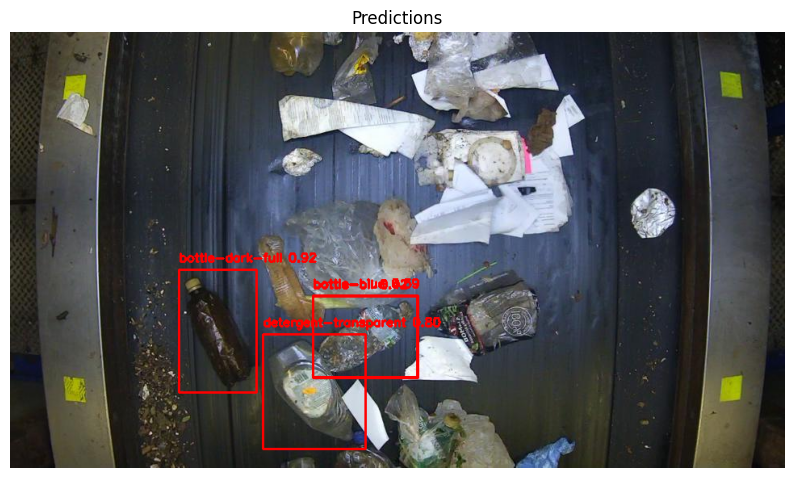


image 1/1 /kaggle/input/warp-waste-recycling-plant-dataset/Warp-D/test/images/Monitoring_photo_2_test_25-Mar_11-52-17.jpg: 384x640 1 milk-cardboard, 25.2ms
Speed: 2.0ms preprocess, 25.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


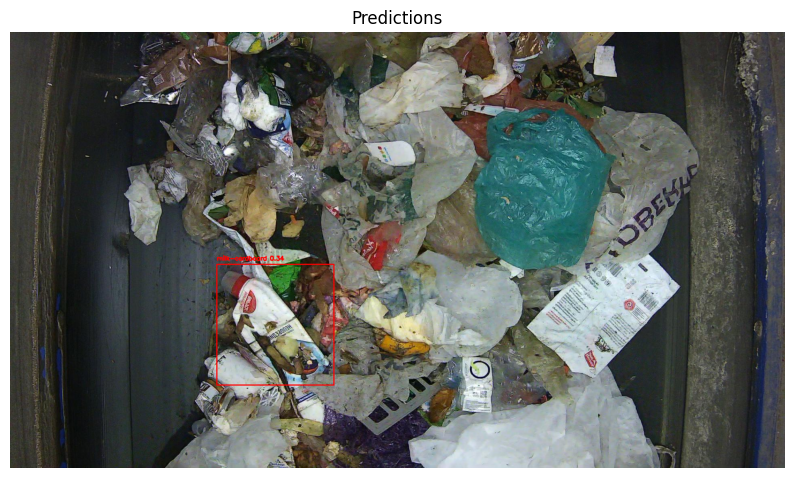


image 1/1 /kaggle/input/warp-waste-recycling-plant-dataset/Warp-D/test/images/POSAD_1_12-Sep_12-59-41.jpg: 384x640 1 bottle-blue, 1 bottle-milk, 1 bottle-transp, 1 bottle-oil, 1 bottle-transp-full, 1 bottle-blue5l, 25.2ms
Speed: 1.9ms preprocess, 25.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


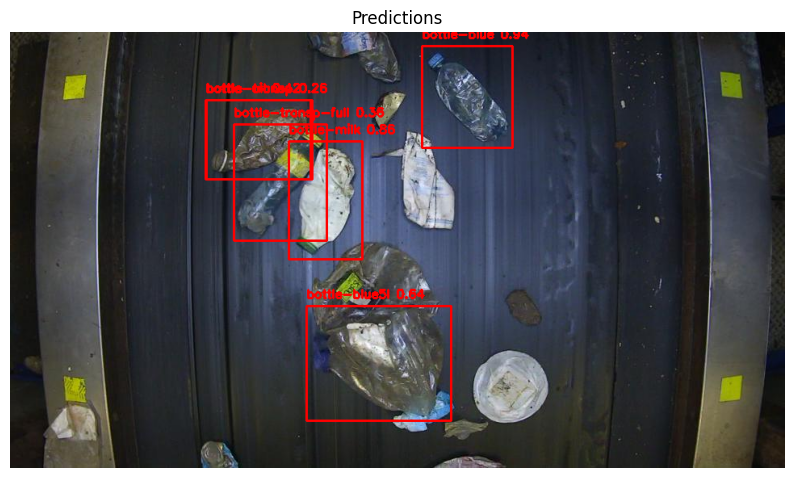


image 1/1 /kaggle/input/warp-waste-recycling-plant-dataset/Warp-D/test/images/prepared_data_all_MGS-05-Nov_03-52-29.jpg: 384x640 1 bottle-transp, 1 bottle-transp-full, 1 bottle-dark-full, 1 bottle-blue5l, 1 glass-transp, 25.2ms
Speed: 2.1ms preprocess, 25.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


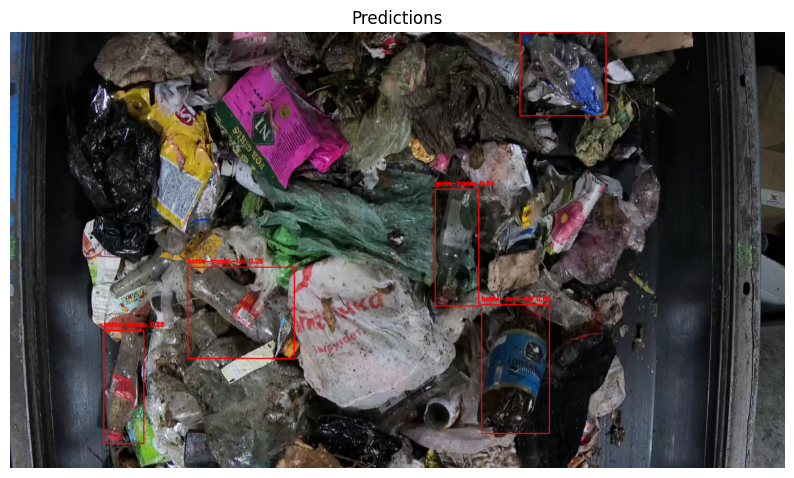


image 1/1 /kaggle/input/warp-waste-recycling-plant-dataset/Warp-D/test/images/POSAD_1_11-Sep_15-59-04.jpg: 384x640 1 bottle-milk, 1 bottle-transp, 1 detergent-white, 1 bottle-blue5l-full, 25.2ms
Speed: 2.0ms preprocess, 25.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model
model = YOLO("/kaggle/input/train-model/tensorflow2/default/1/best.pt")  # Replace with your trained model path

# Function to load and display the image with predictions
def display_image_with_predictions(image_path):
    # Read the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Run predictions
    results = model.predict(image_path, conf=0.25)  # You can adjust the confidence threshold

    # Plot the results
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)

    # Draw bounding boxes on the image
    for result in results:
        boxes = result.boxes  # Get the bounding boxes
        for box in boxes:
            # Get the coordinates and label
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
            
            # Convert class index and confidence score to proper types
            class_index = int(box.cls.item())  # Convert to Python int
            confidence = float(box.conf.item())  # Convert to Python float
            
            label = f"{result.names[class_index]} {confidence:.2f}"  # Get label and confidence
            
            # Draw rectangle and label
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw rectangle
            cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.axis('off')  # Hide axes
    plt.title('Predictions')
    plt.imshow(image_rgb)  # Show image with predictions
    plt.show()

# Path to the directory containing test images
test_images_dir = '/kaggle/input/warp-waste-recycling-plant-dataset/Warp-D/test/images'

# Iterate through all image files in the directory
for image_file in os.listdir(test_images_dir):
    if image_file.endswith(('.png', '.jpg', '.jpeg')):  # Check for image file types
        image_path = os.path.join(test_images_dir, image_file)  # Construct full image path
        display_image_with_predictions(image_path)  # Call the display function


In [ ]:
import cv2
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO('/kaggle/input/train-model/tensorflow2/default/1/best.pt')  # Replace with your model path if different

# Path to the video
video_path = '/kaggle/input/waste-recycle-video/output_video.mp4'  # Update with your video path
output_video_path = '/kaggle/working/output_video.mp4'  # Output path

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the video writer initialized to save the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for the output video
fps = int(cap.get(cv2.CAP_PROP_FPS))  # Frames per second
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # Width of the frames
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # Height of the frames
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Predict on the current frame
    results = model(frame)

    # Plot the bounding boxes on the frame
    annotated_frame = results[0].plot()

    # Write the annotated frame to the output video
    out.write(annotated_frame)

# Release the video capture and writer
cap.release()
out.release()

print(f"Video processing complete. The output video is saved at {output_video_path}")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 384x640 1 milk-cardboard, 1 bottle-transp-full, 80.3ms
Speed: 9.2ms preprocess, 80.3ms inference, 230.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle-blue, 1 bottle-dark, 1 bottle-blue-full, 25.2ms
Speed: 3.1ms preprocess, 25.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 milk-cardboard, 25.1ms
Speed: 2.6ms preprocess, 25.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle-green, 1 milk-cardboard, 1 bottle-green-full, 25.1ms
Speed: 2.0ms preprocess, 25.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.2ms
Speed: 3.0ms preprocess,